# Create a sale data analysis of any commercial store.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\sandi\Desktop\Internship\supermarket_sales.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# Check for missing values in the dataset
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [7]:
# Get a summary of statistics for numerical columns
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [8]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

## Analysis

In [9]:
# Total Revenue, Tax, and Gross Income
total_revenue = df['Total'].sum()
total_tax = df['Tax 5%'].sum()
total_gross_income = total_tax

print("Total Revenue:", total_revenue)

print("Total Tax Collected:", total_tax)

print("Total Gross Income:", total_gross_income)

Total Revenue: 322966.749
Total Tax Collected: 15379.368999999999
Total Gross Income: 15379.368999999999


In [10]:
# Branch-wise Revenue
branch_revenue = df.groupby('Branch')['Total'].sum()
print("Branch Revenue:\n", branch_revenue)

Branch Revenue:
 Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [11]:
# Top Performing Branch
top_branch = branch_revenue.idxmax()
top_branch_revenue = branch_revenue.max()

print("Top Branch:", top_branch, "with Revenue:", top_branch_revenue)


Top Branch: C with Revenue: 110568.7065


In [12]:
# Product Line Sales
product_line_sales = df.groupby('Product line')['Total'].sum()
print("Product Line Sales:\n", product_line_sales)

Product Line Sales:
 Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


In [13]:
# Most Profitable Product Line
most_profitable_product = product_line_sales.idxmax()
most_profitable_revenue = product_line_sales.max()
print("Most Profitable Product Line:", most_profitable_product, "with Revenue:", most_profitable_revenue)

Most Profitable Product Line: Food and beverages with Revenue: 56144.844


In [14]:
# Sales by Gender
sales_by_gender = df.groupby('Gender')['Total'].sum()
print("Sales by Gender:\n", sales_by_gender)

Sales by Gender:
 Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


In [15]:
# Sales by Customer Type
sales_by_customer_type = df.groupby('Customer type')['Total'].sum()
print("Sales by Customer Type:\n", sales_by_customer_type)

Sales by Customer Type:
 Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


In [16]:
# Payment Method Sales
payment_method_sales = df.groupby('Payment')['Total'].sum()
print("Payment Method Sales:\n", payment_method_sales)

Payment Method Sales:
 Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


In [17]:
# Daily Sales Trend
daily_sales = df.groupby('Date')['Total'].sum()

## Visualization

In [18]:
import matplotlib.pyplot as plt

## 1. Branch Revenue Bar Chart

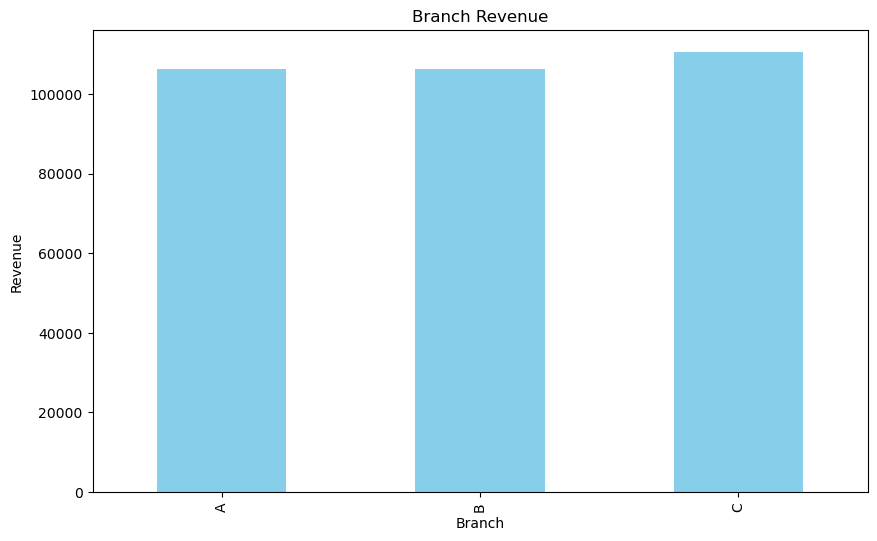

In [19]:
plt.figure(figsize=(10, 6))
branch_revenue.plot(kind='bar', color='skyblue')
plt.title('Branch Revenue')
plt.ylabel('Revenue')
plt.xlabel('Branch')
plt.show()

## 2. Product Line Sales Pie Chart

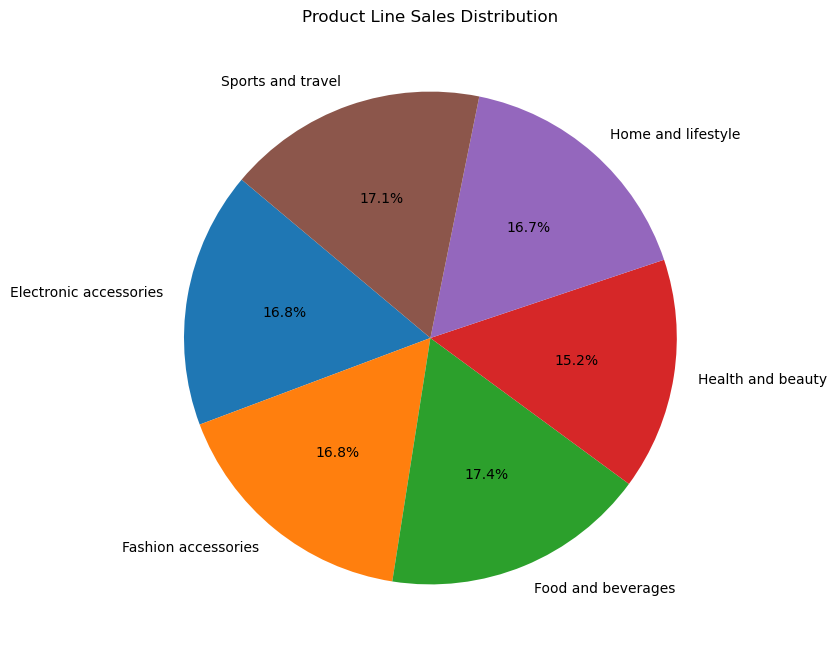

In [20]:
plt.figure(figsize=(8, 8))
product_line_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Product Line Sales Distribution')
plt.ylabel('')
plt.show()

### Food and bevetages have more Sales as compared to others

## 3. Daily Sales Trend

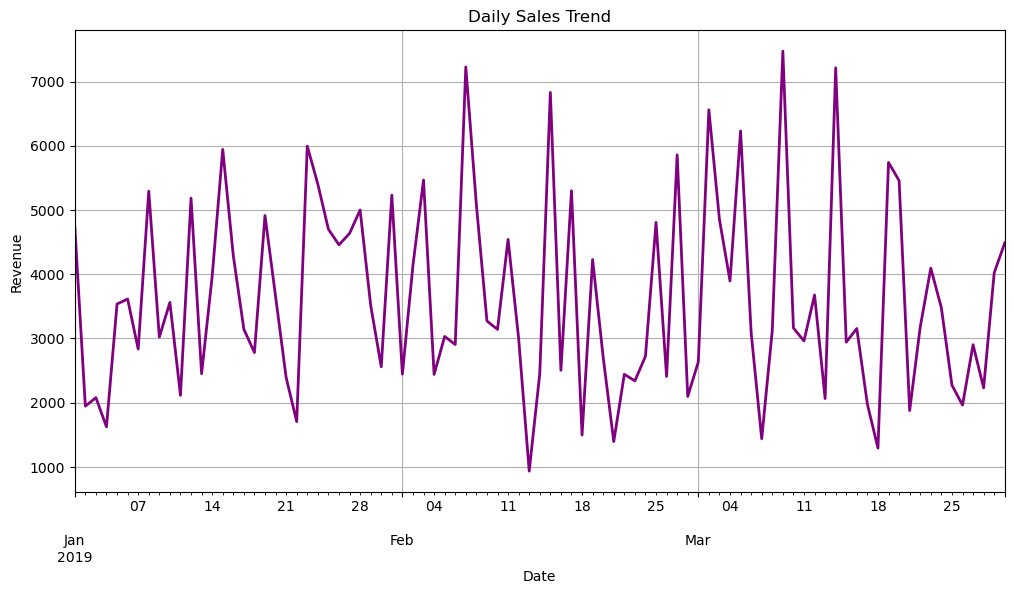

In [21]:
plt.figure(figsize=(12, 6))
daily_sales.plot(color='purple', linewidth=2)
plt.title('Daily Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

## Data Preprocessing:

* Handle categorical variables (e.g., encoding).
* Normalize numerical features.
* Split the data into training and testing sets.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Convert 'Date' to datetime and extract features like day, month

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

## Encode categorical features`

In [24]:

categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

## Select features and target

In [25]:
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 
            'Payment', 'Unit price', 'Quantity', 'Tax 5%', 'gross income', 'Day', 'Month']
target = 'Total'

In [26]:
X = df[features]
y = df[target]

## Split data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Random Forest Regressor

In [28]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Predictions

In [29]:
y_pred = model.predict(X_test)


## Evaluation

In [30]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.7430540249999765
R² Score: 0.9999749642513758


## Interpretation

The Random Forest Regressor has performed exceptionally well, likely due to the simplicity and high predictability of this dataset. The combination of categorical encoding, feature scaling, and random forest's ability to handle diverse data features has contributed to the strong performance.